# trainONE model9_SNOW

WITH SENTENCE: 하이얀 꽃 이파리 눈송이처럼 날리네

snowONE = {0:'white', 1:'color', 2:'leaf'}

(수정) snowONE = {0:'white', 1:'leaf', 2:'color'}


- snowONE.h5(1): 200/200/200 // epoch=50 // acc:98%
- snowONE.h5(2): 1000/1000/1000 // epoch=30 // acc:98%
- snowONE.h5(3): 
- snowONE.h5(4):
- snowONE.h5(5):     

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

snowONE = {0:'white', 1:'leaf', 2:'color'}
actions = []

for v in snowONE.values():
    actions.append(v)

print(actions)

['white', 'leaf', 'color']


In [5]:
data = np.concatenate([
                       # color : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_color_1636380813.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_color_1636381026.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_color_1636381078.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_color_1636381123.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_color_1636381166.npy'),
                       # leaf : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_leaf_1636380322.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_leaf_1636380395.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_leaf_1636380510.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_leaf_1636380620.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_leaf_1636380813.npy'),
                       # white : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_white_1636380322.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_white_1636380395.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_white_1636380510.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_white_1636380620.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetONE/modelONE9/snowONE/one_SL_white_1636380813.npy')
], axis=0)

data.shape

(2850, 10, 90)

In [6]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(len(actions))

(2850, 10, 89)
(2850,)
3


In [7]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))

y_data.shape

(2850, 3)

In [8]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2565, 10, 89) (2565, 3)
(285, 10, 89) (285, 3)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                39424     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/30
81/81 [==============================] - 3s 12ms/step - loss: 8.0809 - acc: 0.4534 - val_loss: 1.7821 - val_acc: 0.5825

Epoch 00001: val_acc improved from -inf to 0.58246, saving model to models/model.h5
Epoch 2/30
81/81 [==============================] - 1s 8ms/step - loss: 1.3718 - acc: 0.6253 - val_loss: 0.8823 - val_acc: 0.6877

Epoch 00002: val_acc improved from 0.58246 to 0.68772, saving model to models/model.h5
Epoch 3/30
81/81 [==============================] - 1s 9ms/step - loss: 0.8301 - acc: 0.6897 - val_loss: 0.7027 - val_acc: 0.7474

Epoch 00003: val_acc improved from 0.68772 to 0.74737, saving model to models/model.h5
Epoch 4/30
81/81 [==============================] - 1s 9ms/step - loss: 0.7917 - acc: 0.6827 - val_loss: 1.3871 - val_acc: 0.5579

Epoch 00004: val_acc did not improve from 0.74737
Epoch 5/30
81/81 [==============================] - 1s 8ms/step - loss: 0.6897 - acc: 0.7361 - val_loss: 0.4158 - val_acc: 0.8175

Epoch 00005: val_acc improved from 0

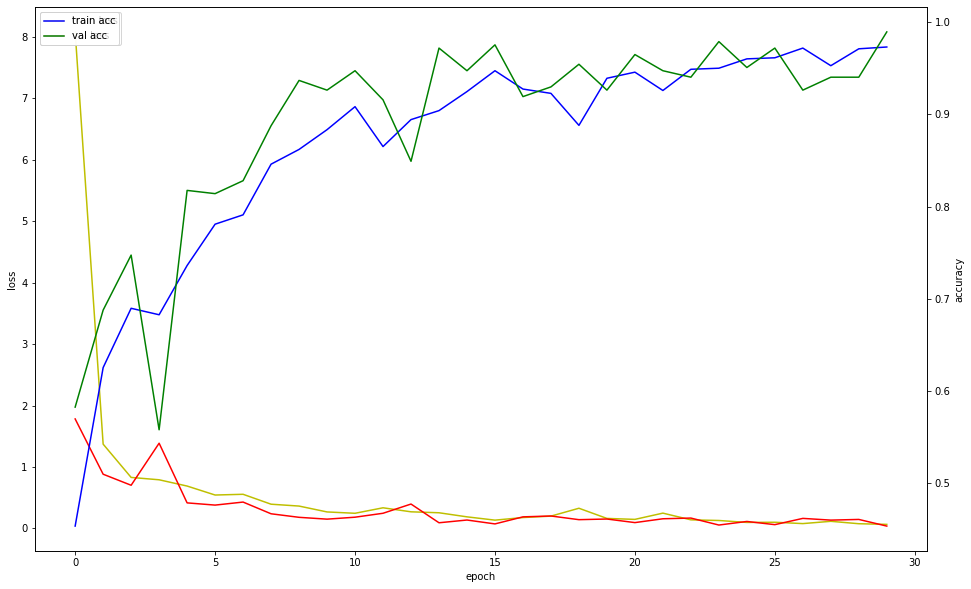

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [12]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[195,   3],
        [  0,  87]],

       [[192,   0],
        [  0,  93]],

       [[180,   0],
        [  3, 102]]])

In [13]:
from keras.models import load_model

model.save('snowONE_2.h5')

from google.colab import files
files.download('snowONE_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>